# Age Salary Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

##### Reading dataset

In [2]:
salary_df = pd.read_csv('dataset/salary.csv')

In [3]:
salary_df.head()

,age,salary
0,17.0,500
1,17.5,700
2,18.0,1000
3,19.0,900
4,19.5,1200


##### Creating explicative (x) and target (y) variables

In [4]:
x = salary_df[['age']]
y = salary_df[['salary']]

In [5]:
corr = salary_df.corr()
corr

,age,salary
age,1.000000,0.687762
salary,0.687762,1.000000


<AxesSubplot:xlabel='age', ylabel='salary'>

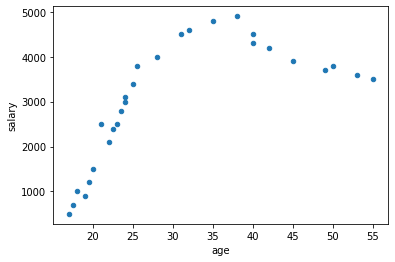

In [6]:
salary_df.plot.scatter('age', 'salary')

### Linear Regression
$y = mx + b$

##### Training the linear regressor

In [7]:
linear_regressor = LinearRegression()
linear_regressor.fit(x, y)

LinearRegression()

Text(0, 0.5, 'salary')

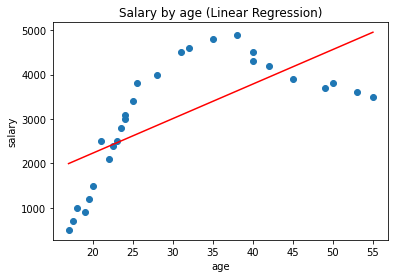

In [8]:
plt.scatter(x, y)
plt.plot(x, linear_regressor.predict(x), color='red')
plt.title('Salary by age (Linear Regression)')
plt.xlabel('age')
plt.ylabel('salary')

In [9]:
linear_regressor.predict([[30]])

array([[3006.47951022]])

In [10]:
linear_regressor.score(x, y)

0.4730167171580161

In [11]:
#m
linear_regressor.coef_

array([[77.87557507]])

In [12]:
#b
linear_regressor.intercept_

array([670.21225819])

In [13]:
linear_regressor.coef_*30 + linear_regressor.intercept_

array([[3006.47951022]])

### Polynomial Regression
$ y = b_{0} + b_{1}x{1} + b_{2}x{1}^2 + ... + b_{m}x_{1}^m + c_{0} + c_{1}x{n} + c_{2}x{n}^2 + ... + c_{m}x_{n}^m $

##### Creating Polynomial Features to solve Polynomial Regression as a Multiple Linear Regression:

$ y = m_{1}x_{1} + m_{2}x_{2} + ... + m_{n}x_{n} + b $

In [14]:
polynomial_transformer = PolynomialFeatures(degree=2)
x_polynomial = polynomial_transformer.fit_transform(x)

In [15]:
polynomial_columns = polynomial_transformer.get_feature_names(x.columns)

In [16]:
x_polynomial = pd.DataFrame(x_polynomial, columns=polynomial_columns)

In [17]:
x_polynomial.head()

,1,age,age^2
0,1.0,17.0,289.00
1,1.0,17.5,306.25
2,1.0,18.0,324.00
3,1.0,19.0,361.00
4,1.0,19.5,380.25


##### Training the polynomial regressor

In [18]:
polynomial_regressor = LinearRegression()
polynomial_regressor.fit(x_polynomial, y)

LinearRegression()

Text(0, 0.5, 'salary')

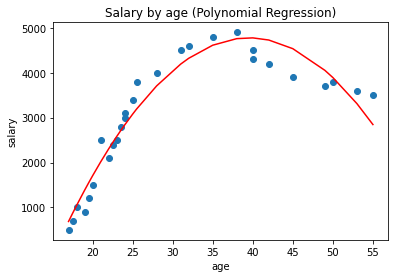

In [19]:
plt.scatter(x, y)
plt.plot(x, polynomial_regressor.predict(x_polynomial), color='red')
plt.title('Salary by age (Polynomial Regression)')
plt.xlabel('age')
plt.ylabel('salary')

In [20]:
polynomial_value = polynomial_transformer.transform([[46]])
polynomial_regressor.predict(polynomial_value)

array([[4438.11868718]])

In [21]:
polynomial_regressor.score(x_polynomial, y)

0.9325657694169833